# Image semantic segmentation for urban studies

A tutorial on convolutional neural networks that are able to split an image into chunks that are each classified according to a certain label corresponding to what is depicted: house, window, tree etc. They do so by producing an image where RGB pixels are replaced with class masks Reference: https://pixellib.readthedocs.io/en/latest/image_ade20k.html

## Part 1: Setup Model ✋

In [1]:
# install relevant libraries
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121
!pip install openmim
!mim install mmengine
!mim install mmcv==2.1.0
!pip install "mmsegmentation>=1.0.0"
!pip install ftfy

Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00


In [18]:
# import libraries
import mmcv
from mmseg.apis import MMSegInferencer
from mmseg.apis import show_result_pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import os

In [5]:
# connect to google drive
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Lab08/')

Mounted at /content/drive


In [3]:
# initialize model
inferencer = MMSegInferencer(model='deeplabv3plus_r101-d8_4xb4-160k_ade20k-512x512')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101-d8_512x512_80k_ade20k/deeplabv3plus_r101-d8_512x512_80k_ade20k_20200615_014139-d5730af7.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101-d8_512x512_80k_ade20k/deeplabv3plus_r101-d8_512x512_80k_ade20k_20200615_014139-d5730af7.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3plus_r101-d8_512x512_80k_ade20k_20200615_014139-d5730af7.pth
/usr/local/lib/python3.11/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.11/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


03/02 23:52:59 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [6]:
# get model class name
adeClasses = pd.read_csv('data/object150_info.csv')
adeClasses.head()

,Idx,Ratio,Train,Val,Stuff,Name
0,1,0.1576,11664,1172,1,wall
1,2,0.1072,6046,612,1,building;edifice
2,3,0.0878,8265,796,1,sky
3,4,0.0621,9336,917,1,floor;flooring
4,5,0.0480,6678,641,0,tree


## Part2: Apply to one image

In [9]:
imgPath = 'data/img/l751EZc9ix-f3FYeOBTbTA_180.jpg'

In [10]:
result = inferencer(imgPath)

Output()

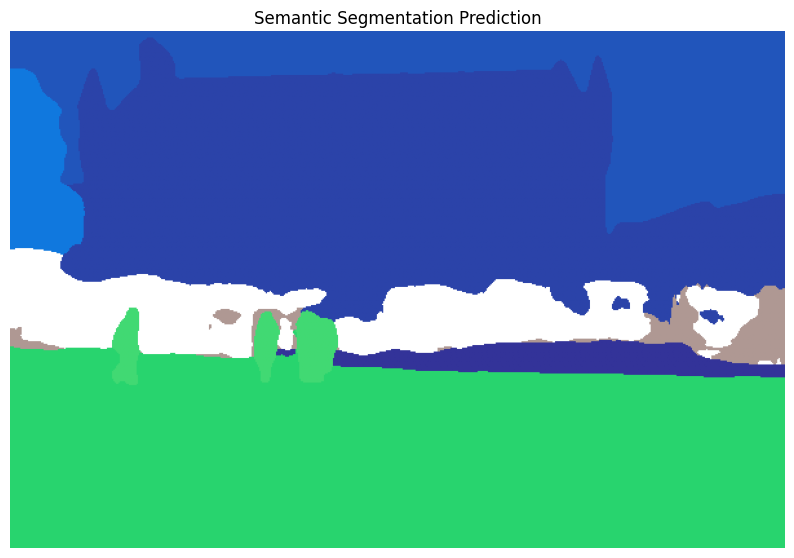

In [8]:
# Visualize the array
plt.figure(figsize=(10, 10))
plt.imshow(result['predictions'], cmap='terrain')  # Use a colormap like 'viridis', 'jet', etc.
# plt.colorbar(label='Class Label')  # Add a colorbar to show the class labels
plt.title('Semantic Segmentation Prediction')
plt.axis('off')  # Hide the axes
plt.show()

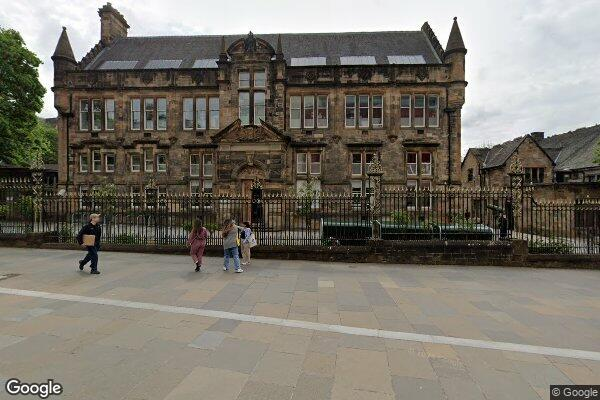

In [13]:
# inspect original image
Image.open(imgPath)

In [15]:
# inspect result format
print(result['predictions'])

[[ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 ...
 [11 11 11 ... 11 11 11]
 [11 11 11 ... 11 11 11]
 [11 11 11 ... 11 11 11]]


In [16]:
# organize result
segResult = pd.DataFrame(np.unique(result['predictions'], return_counts=True), index=['label_id', 'count']).T

In [17]:
segResult['className'] = segResult['label_id'].map(adeClasses['Name'])
# calculate class ratio
segResult['ratio'] = segResult['count'] / segResult['count'].sum()
segResult.head()

,label_id,count,className,ratio
0,0,6514,wall,0.027142
1,1,78029,building;edifice,0.325121
2,2,35487,sky,0.147863
3,4,5966,tree,0.024858
4,11,84059,sidewalk;pavement,0.350246


In [33]:
segResult

,label_id,count,className,ratio
0,0,128,wall,0.000533
1,1,75613,building;edifice,0.315054
2,2,44481,sky,0.185337
3,4,6318,tree,0.026325
4,6,79980,road;route,0.333250
5,9,425,grass,0.001771
6,11,12474,sidewalk;pavement,0.051975
7,13,175,earth;ground,0.000729
8,20,1410,car;auto;automobile;machine;motorcar,0.005875
9,32,18960,fence;fencing,0.079000


## Part3: Batch process

In [19]:
imgFolder = 'data/img/'

In [20]:
imgPaths = [os.path.join(imgFolder, i) for i in os.listdir(imgFolder)]

In [21]:
print(imgPaths)

['data/img/QYbufMMMlmahPoSIt921DQ_180.jpg', 'data/img/QYbufMMMlmahPoSIt921DQ_0.jpg', 'data/img/QYbufMMMlmahPoSIt921DQ_270.jpg', 'data/img/QYbufMMMlmahPoSIt921DQ_90.jpg', 'data/img/9gs15Qu54_MM08kxExE7rA_180.jpg', 'data/img/9gs15Qu54_MM08kxExE7rA_270.jpg', 'data/img/9gs15Qu54_MM08kxExE7rA_90.jpg', 'data/img/9gs15Qu54_MM08kxExE7rA_0.jpg', 'data/img/aVLcmsxXTPKzySfbTmhnrQ_0.jpg', 'data/img/aVLcmsxXTPKzySfbTmhnrQ_270.jpg', 'data/img/aVLcmsxXTPKzySfbTmhnrQ_90.jpg', 'data/img/aVLcmsxXTPKzySfbTmhnrQ_180.jpg', 'data/img/J07krfolmebLRiDLPyEccg_270.jpg', 'data/img/J07krfolmebLRiDLPyEccg_180.jpg', 'data/img/xmUe0H56R-r-9IgQL08IcA_0.jpg', 'data/img/J07krfolmebLRiDLPyEccg_0.jpg', 'data/img/J07krfolmebLRiDLPyEccg_90.jpg', 'data/img/LsQg80MWT1S5TwsodJQh6Q_0.jpg', 'data/img/LsQg80MWT1S5TwsodJQh6Q_90.jpg', 'data/img/xmUe0H56R-r-9IgQL08IcA_180.jpg', 'data/img/xmUe0H56R-r-9IgQL08IcA_90.jpg', 'data/img/xmUe0H56R-r-9IgQL08IcA_270.jpg', 'data/img/LsQg80MWT1S5TwsodJQh6Q_180.jpg', 'data/img/zcHu9lzOtf7DJLNT3L

In [25]:
results = {}

for imgPath in imgPaths[:3]:
  result = inferencer(imgPath)
    # organize result
  segResult = pd.DataFrame(np.unique(result['predictions'], return_counts=True), index=['label_id', 'count']).T
  segResult['className'] = segResult['label_id'].map(adeClasses['Name'])
  # calculate class ratio
  segResult['ratio'] = segResult['count'] / segResult['count'].sum()
  single_result = {}
  for idx, row in segResult.iterrows():
    single_result[row['className']] = row['ratio']
  results[imgPath] = single_result

Output()

Output()

Output()

In [30]:
# convert result to table
resultDF = pd.DataFrame(results).T.reset_index()
resultDF['panoID'] = resultDF['index'].apply(lambda x: x.split('/')[-1].split('_')[0])
resultDF.head()

,index,wall,building;edifice,sky,tree,road;route,grass,sidewalk;pavement,person;individual;someone;somebody;mortal;soul,earth;ground,...,column;pillar,signboard;sign,bannister;banister;balustrade;balusters;handrail,ashcan;trash;can;garbage;can;wastebin;ash;bin;ash-bin;ashbin;dustbin;trash;barrel;trash;bin,plant;flora;plant;life,car;auto;automobile;machine;motorcar,stairs;steps,streetlight;street;lamp,pole,panoID
0,data/img/QYbufMMMlmahPoSIt921DQ_180.jpg,0.004329,0.600925,0.062571,0.005346,0.158133,0.017708,0.003250,0.033217,0.031671,...,0.004463,0.000292,0.000354,0.002979,NaN,NaN,NaN,NaN,NaN,QYbufMMMlmahPoSIt921DQ
1,data/img/QYbufMMMlmahPoSIt921DQ_0.jpg,0.020779,0.454950,0.002725,0.070450,0.279938,NaN,0.029921,0.001629,NaN,...,NaN,0.000104,NaN,NaN,0.057217,0.073913,0.007088,0.000025,0.000054,QYbufMMMlmahPoSIt921DQ
2,data/img/QYbufMMMlmahPoSIt921DQ_270.jpg,0.000533,0.315054,0.185337,0.026325,0.333250,0.001771,0.051975,NaN,0.000729,...,NaN,NaN,NaN,NaN,NaN,0.005875,NaN,NaN,0.000150,QYbufMMMlmahPoSIt921DQ


In [26]:
# load GSV meta info
panoInfo = pd.read_pickle('data/panoid_GLA.p')
panoInfo.head()

,date,lat,lon,panoID
0,2018-04,55.874257,-4.296836,E3nf1qwLDQj37wiW6hNhXA
1,2024-04,55.874293,-4.297249,IikbooOX3WMfkHiinfrkGg
2,2024-04,55.874342,-4.297803,2Rg71GUAy74bnjOkDShd1w
3,2024-04,55.874388,-4.298361,QYbufMMMlmahPoSIt921DQ
4,2024-04,55.874431,-4.298845,9gs15Qu54_MM08kxExE7rA


In [31]:
resultDF = resultDF.merge(panoInfo, on='panoID')
resultDF.head()

,index,wall,building;edifice,sky,tree,road;route,grass,sidewalk;pavement,person;individual;someone;somebody;mortal;soul,earth;ground,...,ashcan;trash;can;garbage;can;wastebin;ash;bin;ash-bin;ashbin;dustbin;trash;barrel;trash;bin,plant;flora;plant;life,car;auto;automobile;machine;motorcar,stairs;steps,streetlight;street;lamp,pole,panoID,date,lat,lon
0,data/img/QYbufMMMlmahPoSIt921DQ_180.jpg,0.004329,0.600925,0.062571,0.005346,0.158133,0.017708,0.003250,0.033217,0.031671,...,0.002979,NaN,NaN,NaN,NaN,NaN,QYbufMMMlmahPoSIt921DQ,2024-04,55.874388,-4.298361
1,data/img/QYbufMMMlmahPoSIt921DQ_0.jpg,0.020779,0.454950,0.002725,0.070450,0.279938,NaN,0.029921,0.001629,NaN,...,NaN,0.057217,0.073913,0.007088,0.000025,0.000054,QYbufMMMlmahPoSIt921DQ,2024-04,55.874388,-4.298361
2,data/img/QYbufMMMlmahPoSIt921DQ_270.jpg,0.000533,0.315054,0.185337,0.026325,0.333250,0.001771,0.051975,NaN,0.000729,...,NaN,NaN,0.005875,NaN,NaN,0.000150,QYbufMMMlmahPoSIt921DQ,2024-04,55.874388,-4.298361


In [32]:
resultDF.to_csv('segResult_GLA.csv')